<a href="https://colab.research.google.com/github/mochammadcholilurrokhman/PCVK_Ganjil_Mochammad-Cholilur-Rokhman/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 beriku

In [12]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

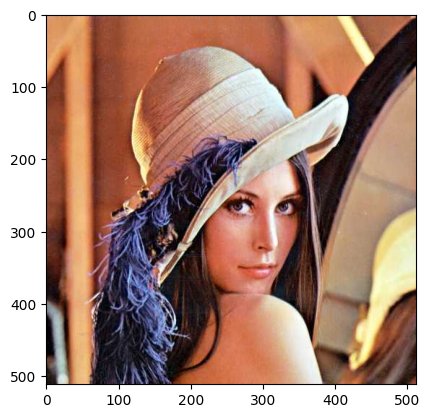

In [13]:
original = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
image = (cv.cvtColor(original, cv.COLOR_BGR2RGB)) #konversi channel BGR -> RGB
plt.imshow(image)

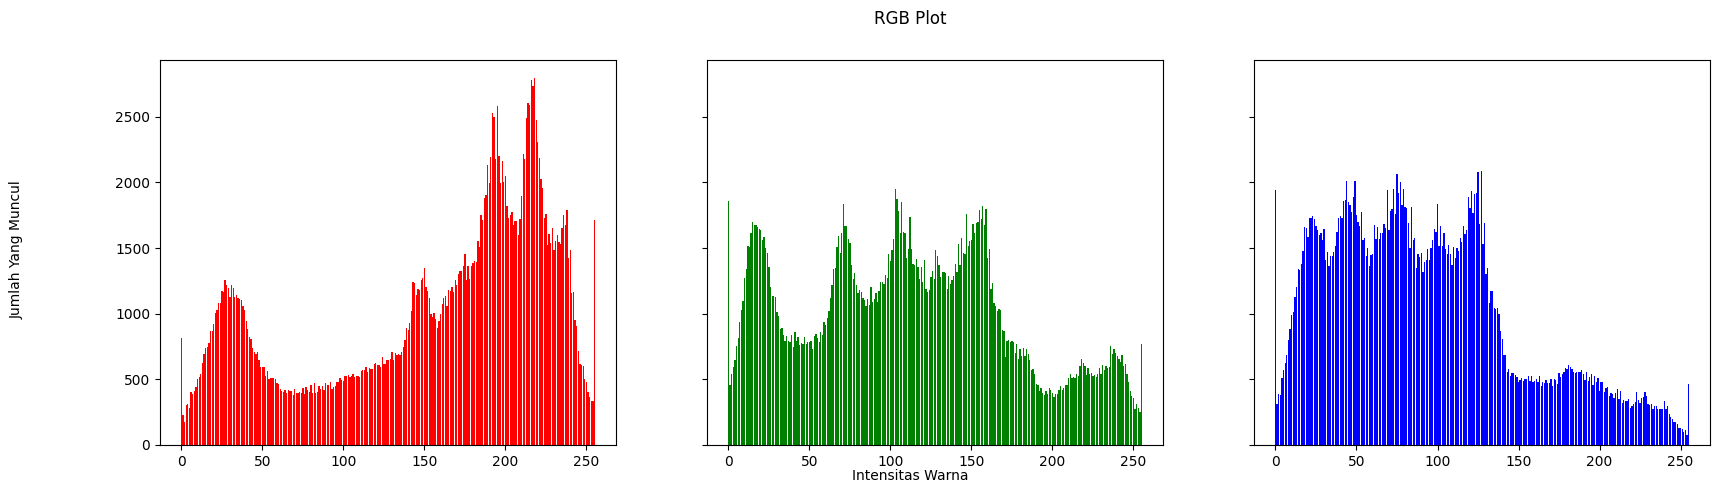

In [14]:
# Inisialisasi array intensitas untuk setiap saluran warna
blue_intensity = [0] * 256
green_intensity = [0] * 256
red_intensity = [0] * 256

# Menghitung intensitas warna untuk setiap saluran warna
for channel in range(3):
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            intensity = image[y, x, channel]
            if channel == 0:
                red_intensity[intensity] += 1
            elif channel == 1:
                green_intensity[intensity] += 1
            elif channel == 2:
                blue_intensity[intensity] += 1

# Range intensitas warna
color_range = np.arange(256)

# Buat plot histogram untuk masing-masing saluran warna
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('RGB Plot')
fig.text(0.05, 0.5, 'Jumlah Yang Muncul', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(color_range, red_intensity, color='red')
axs[1].bar(color_range, green_intensity, color='green')
axs[2].bar(color_range, blue_intensity, color='blue')

plt.show()

### Hasil Analisa
1. Tiga array (blue_intensity, green_intensity, red_intensity) diinisialisasi dengan panjang 256 (untuk setiap nilai intensitas dari 0 hingga 255) dan diisi dengan nilai 0. Array ini akan digunakan untuk menyimpan jumlah kemunculan setiap intensitas warna.
2. Loop pertama (*for channel in range(3))* iterasi melalui tiga saluran warna (0 untuk merah, 1 untuk hijau, dan 2 untuk biru).
3. Loop kedua *(for y in range(image.shape[0]))* iterasi melalui setiap baris piksel dalam gambar.
4. Loop ketiga *(for x in range(image.shape[1]))* iterasi melalui setiap kolom piksel dalam gambar.
5. *intensity = image[y, x, channel]* mengambil nilai intensitas warna pada posisi (y, x) untuk saluran warna yang sedang diproses.
6. Berdasarkan saluran warna (channel), nilai intensitas ditambahkan ke array intensitas yang sesuai (red_intensity, green_intensity, atau blue_intensity).
7. *color_range* adalah array yang berisi nilai dari 0 hingga 255, yang akan digunakan sebagai sumbu x dalam plot histogram.
8. *fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True) *membuat tiga subplot dalam satu baris dengan ukuran 20x5.
9. *fig.suptitle('RGB Plot')* menambahkan judul utama untuk seluruh plot.
10. *fig.text(0.05, 0.5, 'Jumlah Yang Muncul', va='center', rotation='vertical')* menambahkan label untuk sumbu y.
11. *fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')* menambahkan label untuk sumbu x.

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama? <br>
Jawaban : Outputnya Sama

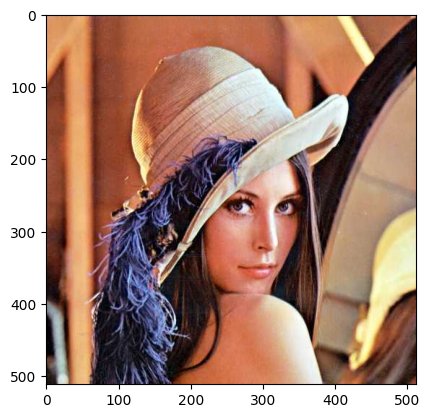

In [15]:
original = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
img = (cv.cvtColor(original, cv.COLOR_BGR2RGB)) #konversi channel BGR -> RGB
plt.imshow(img)

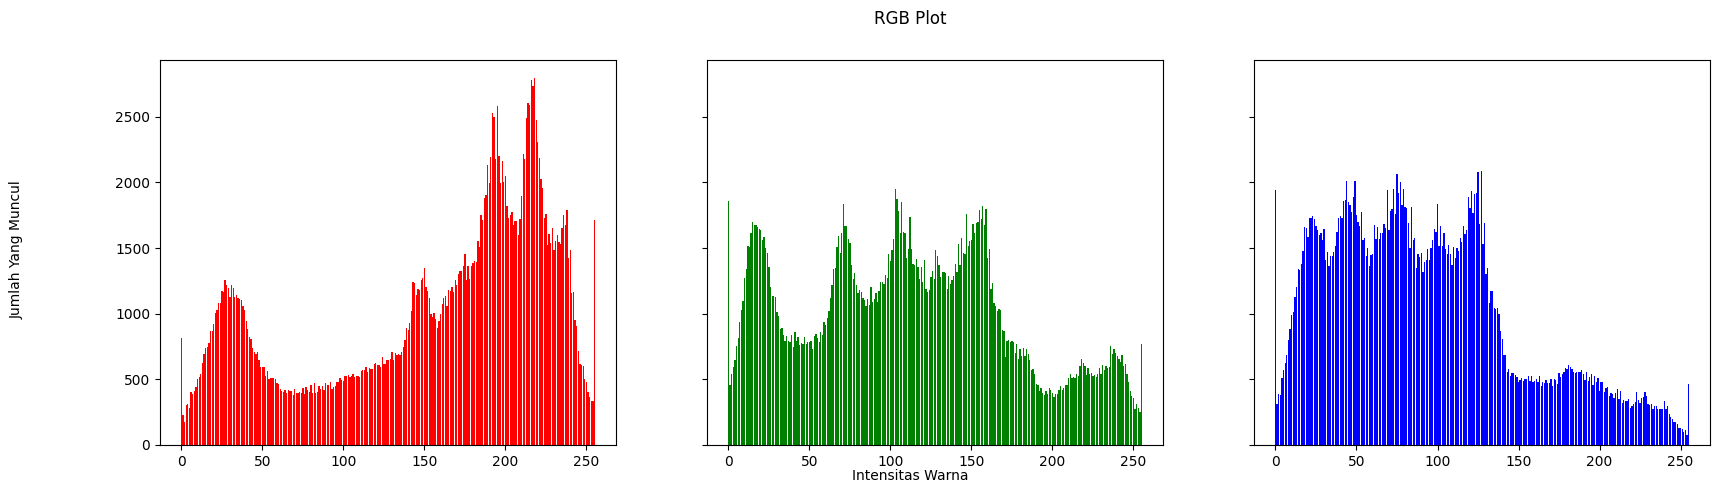

In [16]:

# Menghitung histogram menggunakan numpy.histogram
red_hist, _ = np.histogram(img[:, :, 0], bins=256, range=(0, 256))
green_hist, _ = np.histogram(img[:, :, 1], bins=256, range=(0, 256))
blue_hist, _ = np.histogram(img[:, :, 2], bins=256, range=(0, 256))

# Range intensitas warna
color_range = np.arange(256)

# Buat plot histogram untuk masing-masing saluran warna
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('RGB Plot')
fig.text(0.05, 0.5, 'Jumlah Yang Muncul', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(color_range, red_hist, color='red')
axs[1].bar(color_range, green_hist, color='green')
axs[2].bar(color_range, blue_hist, color='blue')

plt.show()

### Hasil Analisa
1. Menghitung Histogram: Menggunakan *numpy.histogram* untuk menghitung histogram intensitas warna untuk setiap saluran warna (merah, hijau, dan biru). Fungsi *numpy.histogram* mengembalikan dua nilai: *histogram (red_hist, green_hist, blue_hist)*.
2. Range Intensitas Warna: Membuat array *color_range* yang berisi nilai dari 0 hingga 255, yang akan digunakan sebagai sumbu x dalam plot histogram.
3. Membuat Plot Histogram: Menggunakan matplotlib untuk membuat plot histogram untuk setiap saluran warna. Tiga subplot dibuat dalam satu baris dengan ukuran 20x5. Histogram untuk saluran warna merah, hijau, dan biru masing-masing diplot pada subplot yang berbeda.

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)


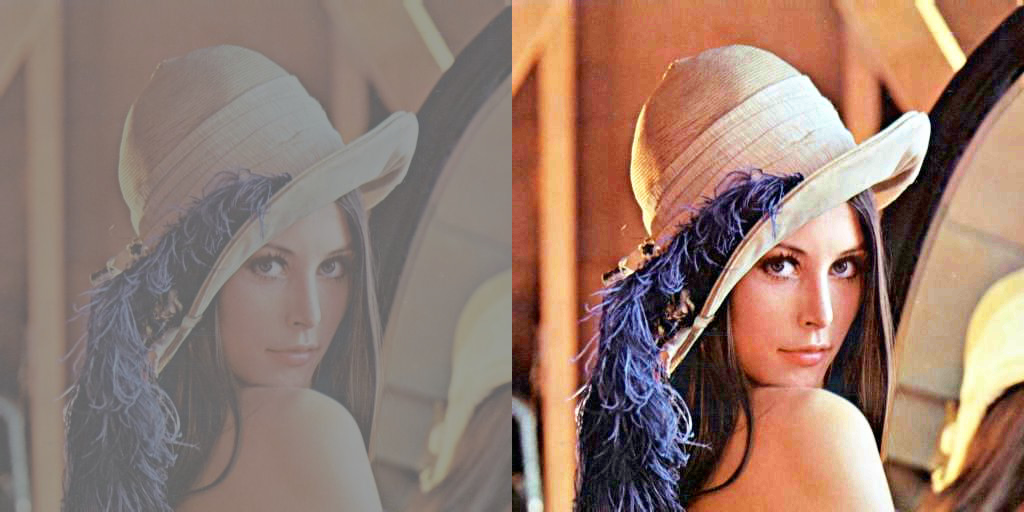

<BarContainer object of 256 artists>

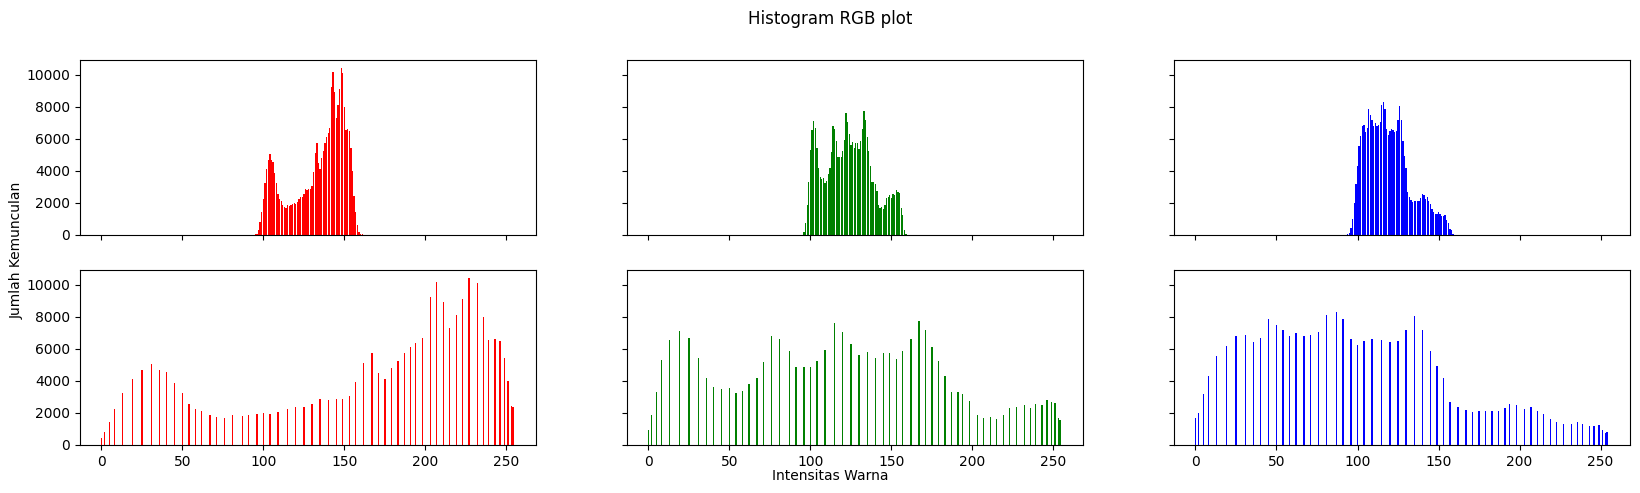

In [17]:
blue = [0]*256
green = [0]*256
red = [0]*256

img1 = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

#convert to Numpy array
img_array = np.asarray(img1)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
#is_color_image = len(img1.shape) == 3 and img1.shape[2] == 3

fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0, 0].bar(names, histo_asli[2], color='red')
axs[0, 1].bar(names, histo_asli[1], color='green')
axs[0, 2].bar(names, histo_asli[0], color='blue')
axs[1, 0].bar(names, equal_histo[2], color='red')
axs[1, 1].bar(names, equal_histo[1], color='green')
axs[1, 2].bar(names, equal_histo[0], color='blue')

### Hasil Analisa
1. Fungsi histog: Menghitung histogram untuk setiap kanal warna (biru, hijau, merah) dari gambar.
Inisialisasi: Mendapatkan dimensi gambar (height, width, depth) dan membuat array ax untuk menyimpan histogram.
2. Looping: Melakukan iterasi melalui setiap piksel gambar dan menambahkan nilai intensitas piksel ke histogram yang sesuai.
3. Histogram Asli: Menghitung histogram asli dari gambar img1 dan menyimpannya dalam histo_asli.
4. *img_array = np.asarray(img1)* <br>
Konversi: Mengonversi gambar ke array numpy untuk memudahkan manipulasi data.
5. Histogram: Menghitung histogram dari gambar yang telah diflatten menggunakan np.bincount.
6. Normalisasi: Menormalkan histogram dengan membagi setiap nilai dengan jumlah total piksel.
7. Histogram Kumulatif: Menghitung histogram kumulatif ternormalisasi menggunakan np.cumsum.
8. Peta Transformasi: Membuat peta transformasi untuk equalization dengan mengalikan histogram kumulatif dengan 255 dan mengonversinya ke tipe data uint8.
9. Flatten: Mengubah array gambar menjadi list satu dimensi.
10. Transformasi: Menggunakan peta transformasi untuk mentransformasi nilai piksel gambar.
11. Reshape: Mengonversi kembali gambar yang telah ditransformasi ke bentuk array numpy dan menyimpannya dalam img2.
12. Histogram Equalized: Menghitung histogram dari gambar yang telah di-equalize dan menyimpannya dalam equal_histo.
13. Inisialisasi: Membuat array names untuk sumbu x histogram.



6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

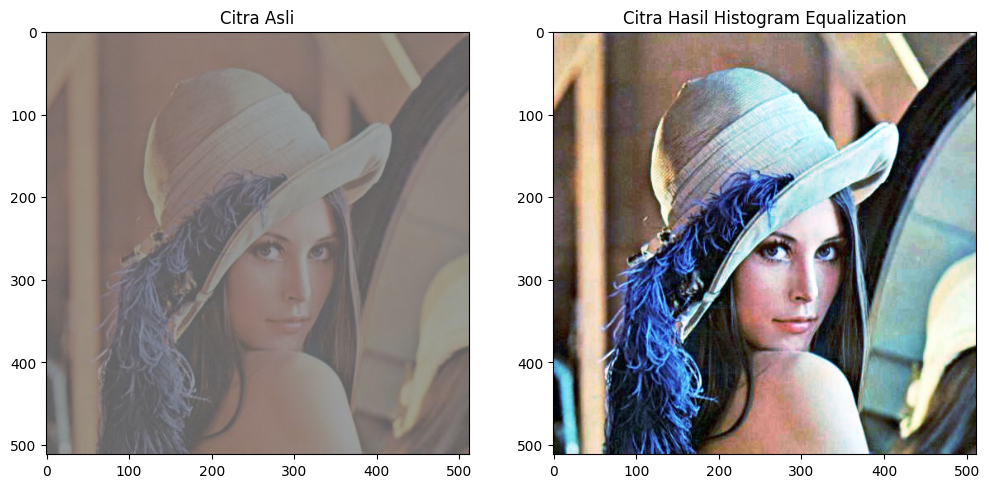

In [18]:
# Pisahkan saluran warna (B, G, R)
img2 = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
b, g, r = cv.split(img2)

# Terapkan histogram equalization pada masing-masing saluran warna
equalized_b = cv.equalizeHist(b)
equalized_g = cv.equalizeHist(g)
equalized_r = cv.equalizeHist(r)

# Gabungkan kembali saluran warna yang telah diubah
equalized_image = cv.merge((equalized_b, equalized_g, equalized_r))

# Tampilkan citra asli
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')

# Tampilkan citra yang telah diekualisasi
plt.subplot(122)
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))
plt.title('Citra Hasil Histogram Equalization')

plt.show()

Hasilnya berbeda

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

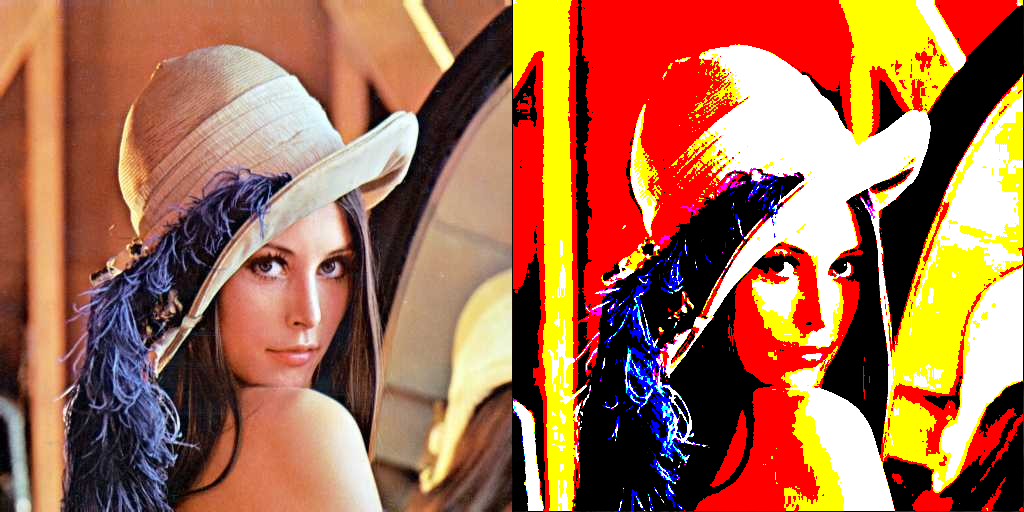

In [19]:
def threshold(color):
  if color > 255:
    return 255
  elif color < 0:
    return 0
  else:
    return color

original = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

# Pemisahan gambar
(B, G, R) = cv.split(original)

# Inisialisasi gambar baru
img_pixel_blue = np.zeros(B.shape, B.dtype)
img_pixel_green = np.zeros(G.shape, G.dtype)
img_pixel_red = np.zeros(R.shape, R.dtype)

# Loop Pemrosesan Utama

for y in range(0, R.shape[0] - 1):
  for x in range(1, R.shape[1] - 1):
    pixel_blue_old = B[y, x]
    pixel_green_old = G[y, x]
    pixel_red_old = R[y, x]
    pixel_distance = 1

    pixel_blue_new = np.round(pixel_distance * pixel_blue_old / 255) * (255 / pixel_distance)
    pixel_green_new = np.round(pixel_distance * pixel_green_old / 255) * (255 / pixel_distance)
    pixel_red_new = np.round(pixel_distance * pixel_red_old / 255) * (255 / pixel_distance)

    img_pixel_blue[y, x] = pixel_blue_new
    img_pixel_green[y, x] = pixel_green_new
    img_pixel_red[y, x] = pixel_red_new

    error_blue = pixel_blue_old - pixel_blue_new
    error_green = pixel_green_old - pixel_green_new
    error_red = pixel_red_old - pixel_red_new

    img_pixel_blue[y, x + 1] = threshold(img_pixel_blue[y, x + 1] + error_blue * 7/16)
    img_pixel_green[y, x + 1] = threshold(img_pixel_green[y, x + 1] + error_green * 7/16)
    img_pixel_red[y, x + 1] = threshold(img_pixel_red[y, x + 1] + error_red * 7/16)

    img_pixel_blue[y + 1, x - 1] = threshold(img_pixel_blue[y + 1, x - 1] + error_blue * 3/16)
    img_pixel_green[y + 1, x - 1] = threshold(img_pixel_green[y + 1, x - 1] + error_green * 3/16)
    img_pixel_red[y + 1, x - 1] = threshold(img_pixel_red[y + 1, x - 1] + error_red * 3/16)

    img_pixel_blue[y + 1, x] = threshold(img_pixel_blue[y + 1, x] + error_blue * 5/16)
    img_pixel_green[y + 1, x] = threshold(img_pixel_green[y + 1, x] + error_green * 5/16)
    img_pixel_red[y + 1, x] = threshold(img_pixel_red[y + 1, x] + error_red * 5/16)

    img_pixel_blue[y + 1, x + 1] = threshold(img_pixel_blue[y + 1, x + 1] + error_blue * 1/16)
    img_pixel_green[y + 1, x + 1] = threshold(img_pixel_green[y + 1, x + 1] + error_green * 1/16)
    img_pixel_red[y + 1, x + 1] = threshold(img_pixel_red[y + 1, x + 1] + error_red * 1/16)

new_image = cv.merge((img_pixel_blue, img_pixel_green, img_pixel_red))

final_frame = cv.hconcat((original, new_image))
cv2_imshow(final_frame)

### Hasil Analisa
1. Fungsi Threshold : Fungsi ini memastikan bahwa nilai warna tetap dalam rentang yang valid [0, 255]. Jika nilainya melebihi 255, maka akan ditetapkan menjadi 255. Jika di bawah 0, akan diatur menjadi 0. Ini membantu mencegah overflow atau underflow pada nilai piksel.
2. Inisialisasi Saluran Gambar Baru : Array kosong baru diinisialisasi untuk setiap saluran warna untuk menyimpan nilai piksel yang telah diproses.
3. Loop Pemrosesan Utama Untuk setiap piksel (kecuali piksel tepi)
*  Membaca nilai piksel saat ini.
*   Melakukan kuantisasi nilai piksel (mengurangi jumlah nilai piksel yang berbeda)
*  Menyimpan nilai kuantisasi dalam array gambar baru.
*   Menghitung kesalahan kuantisasi.
*  Mendistribusikan kesalahan kuantisasi ke piksel tetangga menggunakan algoritma Floyd-Steinberg dithering. Ini membantu menyebarkan kesalahan dan membuat gambar terlihat lebih halus.





8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

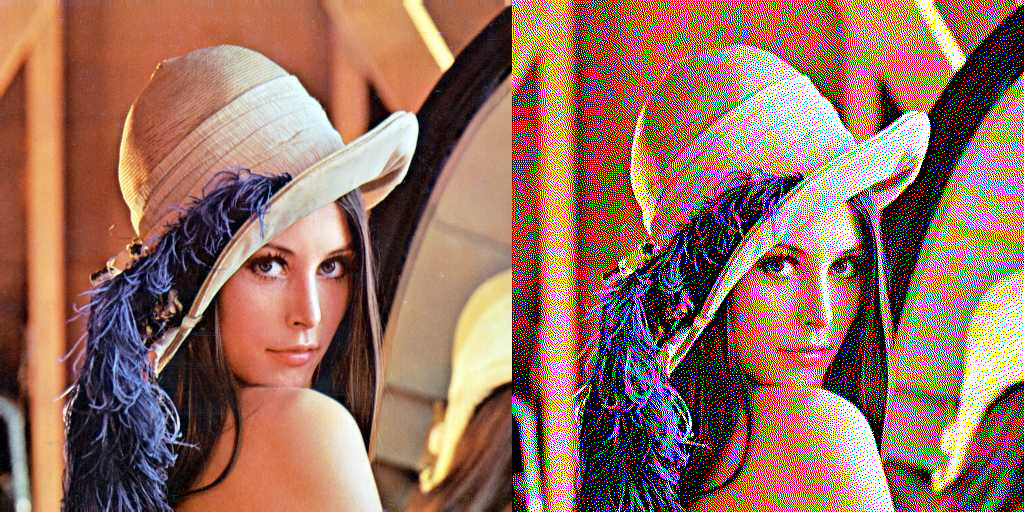

In [20]:
image = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
b, g, r = cv.split(image)

# menerapkan dithering ke chanel
for channel in [b, g, r]:
    height, width = channel.shape

    # inisialisasi image
    new_channel = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            old_value = channel[y, x]
            new_value = 0

            if old_value > 128:
                new_value = 255

            channel[y, x] = new_value

            error = old_value - new_value

            if x < width - 1:
                new_number = channel[y, x + 1] + error * 7 / 16
                if new_number > 255:
                    new_number = 255
                elif new_number < 0:
                    new_number = 0
                channel[y, x + 1] = new_number

            if x > 0 and y < height - 1:
                new_number = channel[y + 1, x - 1] + error * 3 / 16
                if new_number > 255:
                    new_number = 255
                elif new_number < 0:
                    new_number = 0
                channel[y + 1, x - 1] = new_number

            if y < height - 1:
                new_number = channel[y + 1, x] + error * 5 / 16
                if new_number > 255:
                    new_number = 255
                elif new_number < 0:
                    new_number = 0
                channel[y + 1, x] = new_number

            if y < height - 1 and x < width - 1:
                new_number = channel[y + 1, x + 1] + error * 1 / 16
                if new_number > 255:
                    new_number = 255
                elif new_number < 0:
                    new_number = 0
                channel[y + 1, x + 1] = new_number

    # Store dithered channel in new image
    new_channel = channel

# Merge channels into final image
new_image = cv.merge([b, g, r])

# Display original and dithered images

final_frame = cv.hconcat((image, new_image))
cv2_imshow(final_frame)

### Hasil Analisa
1. Saluran warna biru (B), hijau (G), dan merah (R) dipecah menjadi tiga saluran warna terpisah.

2. Untuk setiap saluran warna (biru, hijau, dan merah), kita membuat citra baru yang akan menjadi hasil dari proses dithering, yaitu img_pixel_blue, img_pixel_green, dan img_pixel_red. Citra-citra ini diinisialisasi dengan ukuran yang sama seperti citra asli dan tipe data np.uint8.

3. Dilakukan iterasi melalui setiap piksel dalam citra asli (saluran warna) menggunakan dua loop bersarang, satu untuk mengakses koordinat y (tinggi) dan satu lagi untuk koordinat x (lebar).

4. Untuk setiap piksel dalam saluran warna (channel), kita menghitung nilai piksel baru (new_value) berdasarkan ambang batas tertentu. Dalam hal ini, jika nilai piksel asli (old_value) lebih besar dari 128, maka nilai baru diatur menjadi 255 (putih); jika tidak, diatur menjadi 0 (hitam).

5. Selanjutnya, kita menghitung error antara nilai piksel asli dan nilai baru yang telah dihitung sebelumnya. Error ini akan digunakan untuk mendistribusikan kesalahan ke piksel-piksel tetangga.

6. Dilakukan distribusi kesalahan ke piksel-piksel tetangga berdasarkan bobot tertentu yang didefinisikan dalam algoritma Floyd-Steinberg. Ini mencakup piksel yang berada di sebelah kanan, bawah kiri, bawah, dan bawah kanan dari piksel saat ini.

7. Untuk setiap piksel tetangga yang menerima distribusi kesalahan, kita menghitung nilai baru untuk piksel tersebut berdasarkan error yang telah dihitung sebelumnya. Kita juga memastikan bahwa nilai piksel tersebut berada dalam rentang 0 hingga 255 menggunakan fungsi threshold.

8. Proses di atas diulangi untuk setiap piksel dalam citra asli, sehingga kesalahan didistribusikan secara iteratif.

9. Setelah proses dithering selesai untuk semua piksel dalam saluran warna, citra hasil dithering untuk saluran tersebut disimpan dalam citra baru yang telah diinisialisasi sebelumnya.

10. Terakhir, citra hasil dithering untuk saluran warna biru, hijau, dan merah digabungkan kembali untuk membentuk citra hasil akhir menggunakan cv.merge.


9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!


<ipython-input-23-7aea38152ad1>:17: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 550 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  dithered_image[y, x] = new_pixel


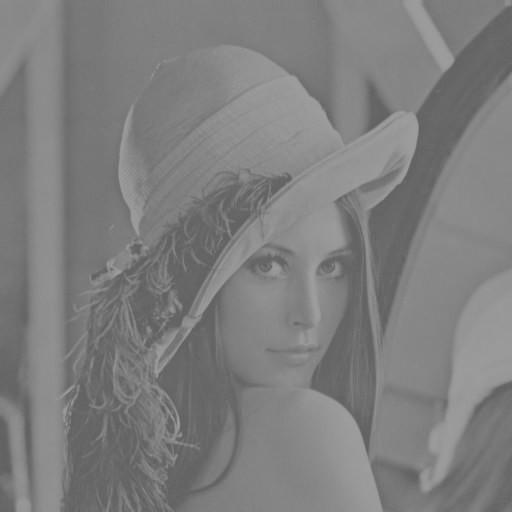

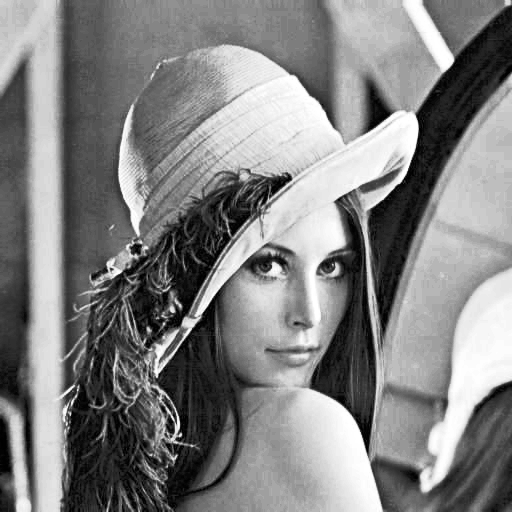

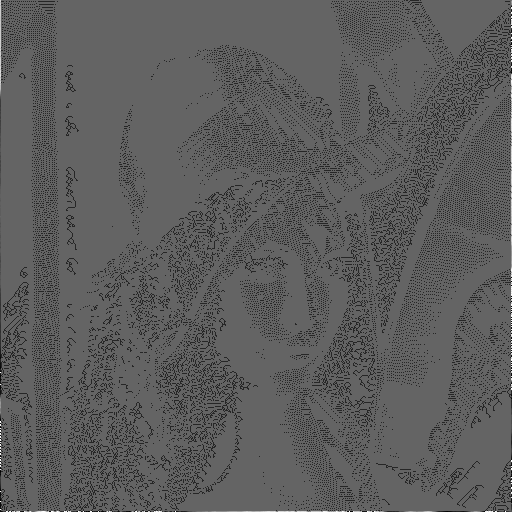

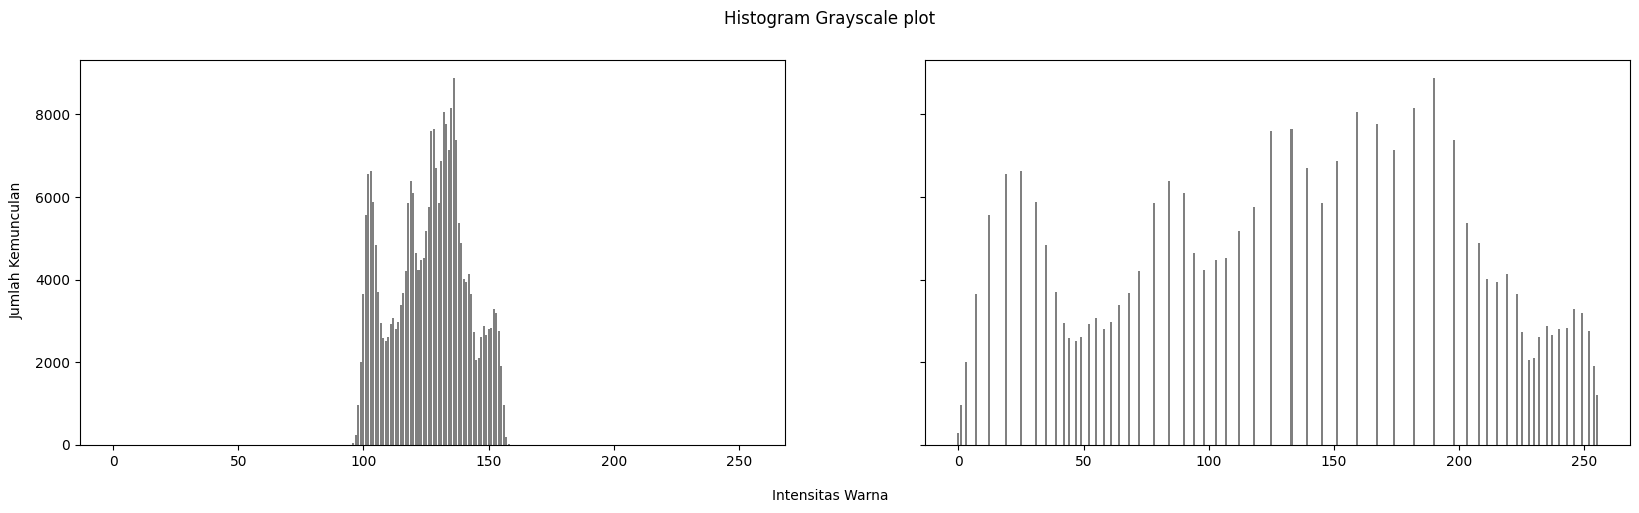

In [23]:
# Baca citra asli
image = cv.imread("/content/drive/MyDrive/PCVK/lena_lc.jpg", cv.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_image = cv.equalizeHist(image)

# Implementasikan proses dithering Floyd-Steinberg
height, width = equalized_image.shape[0], equalized_image.shape[1]
dithered_image = np.copy(equalized_image)

threshold = 230

for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 550 if old_pixel >= threshold else 100
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x] += quantization_error * 3 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 3 / 16

# Hitung histogram untuk citra grayscale asli dan citra hasil equalization
histo_asli = cv.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram grayscale
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[1].bar(range(256), histo_equalized[:,0], color='gray')

# Tampilkan citra hasil
cv2_imshow(image)
cv2_imshow(equalized_image)
cv2_imshow(dithered_image)

plt.show()

### Hasil Analisa
1. Implementasi Proses Dithering Floyd-Steinberg
*   Inisialisasi: Variabel height dan width menyimpan dimensi gambar.
*  Kopi Citra: dithered_image adalah salinan dari gambar hasil equalization.
*   Threshold: Nilai threshold ditetapkan untuk menentukan piksel mana yang akan ditingkatkan atau diturunkan.
*   Loop Pemrosesan: Setiap piksel diperiksa dan diubah berdasarkan nilai threshold. Kesalahan kuantisasi dihitung dan didistribusikan ke piksel tetangga menggunakan algoritma Floyd-Steinberg, yang membantu dalam menghaluskan gambar hasil kuantisasi.

2. Hitung Histogram untuk Citra Asli dan Citra Hasil Equalization : Histogram citra asli dan citra hasil equalization dihitung untuk menunjukkan distribusi intensitas piksel dalam kedua gambar tersebut.


